# <span style="color: #2E86C1; font-family: Arial, sans-serif;">Task-01: Visualize Distribution with a Bar Chart and Histogram</span>
#### <span style=" font-family: 'Courier New', Courier, monospace;">Developed by: Azhar Derardja</span>


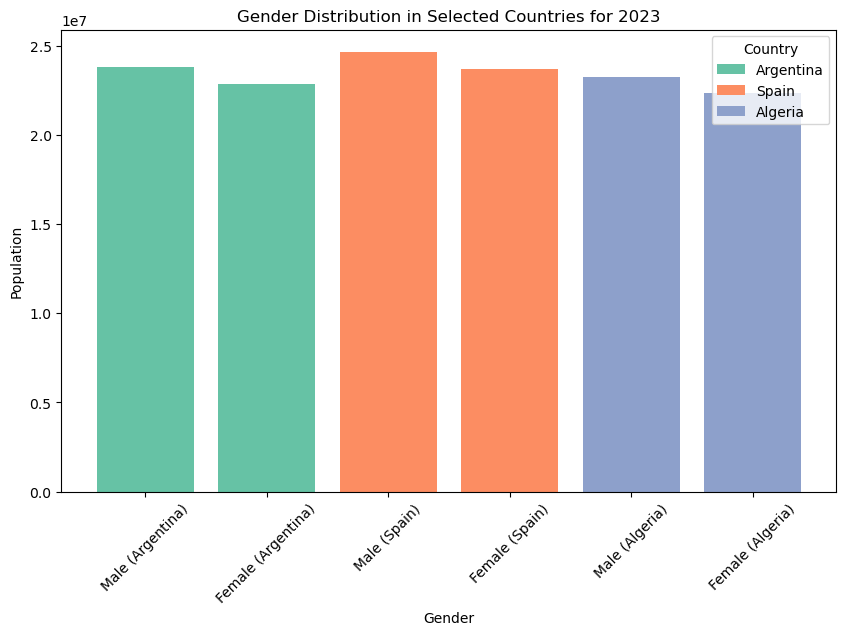

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the uploaded CSV file
file_path = 'API_SP.POP.TOTL_DS2_en_csv_v2_2391096.csv'
df = pd.read_csv(file_path, skiprows=4)

# Get the latest available year (last column in the dataframe)
latest_year = df.columns[-2]  

# Filter the data for the latest year
latest_data = df[['Country Name', latest_year]].dropna()

# Rename columns for easier access
latest_data.columns = ['Country', 'Population']

# Convert population to numeric (in case it's read as a string)
latest_data['Population'] = pd.to_numeric(latest_data['Population'], errors='coerce')

# Drop rows where population data could not be converted to numeric
latest_data = latest_data.dropna(subset=['Population'])

# Mock gender distribution for a few selected countries
# Normally, you would have real data for gender distribution
selected_countries = ['Argentina', 'Tunisia', 'Algeria']
gender_data = {
    'Country': [],
    'Gender': [],
    'Population': []
}

for country in selected_countries:
    total_population = latest_data[latest_data['Country'] == country]['Population'].values[0]
    male_population = total_population * 0.51  # Assume 51% male
    female_population = total_population * 0.49  # Assume 49% female
    gender_data['Country'].extend([country, country])
    gender_data['Gender'].extend(['Male', 'Female'])
    gender_data['Population'].extend([male_population, female_population])

gender_df = pd.DataFrame(gender_data)

# Plot the gender distribution as a bar plot
plt.figure(figsize=(10, 6))

# Create a bar plot
for country in selected_countries:
    subset = gender_df[gender_df['Country'] == country]
    plt.bar(subset['Gender'] + ' (' + country + ')', subset['Population'], label=country)

plt.xlabel('Gender')
plt.ylabel('Population')
plt.title(f'Gender Distribution in Selected Countries for {latest_year}')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.show()


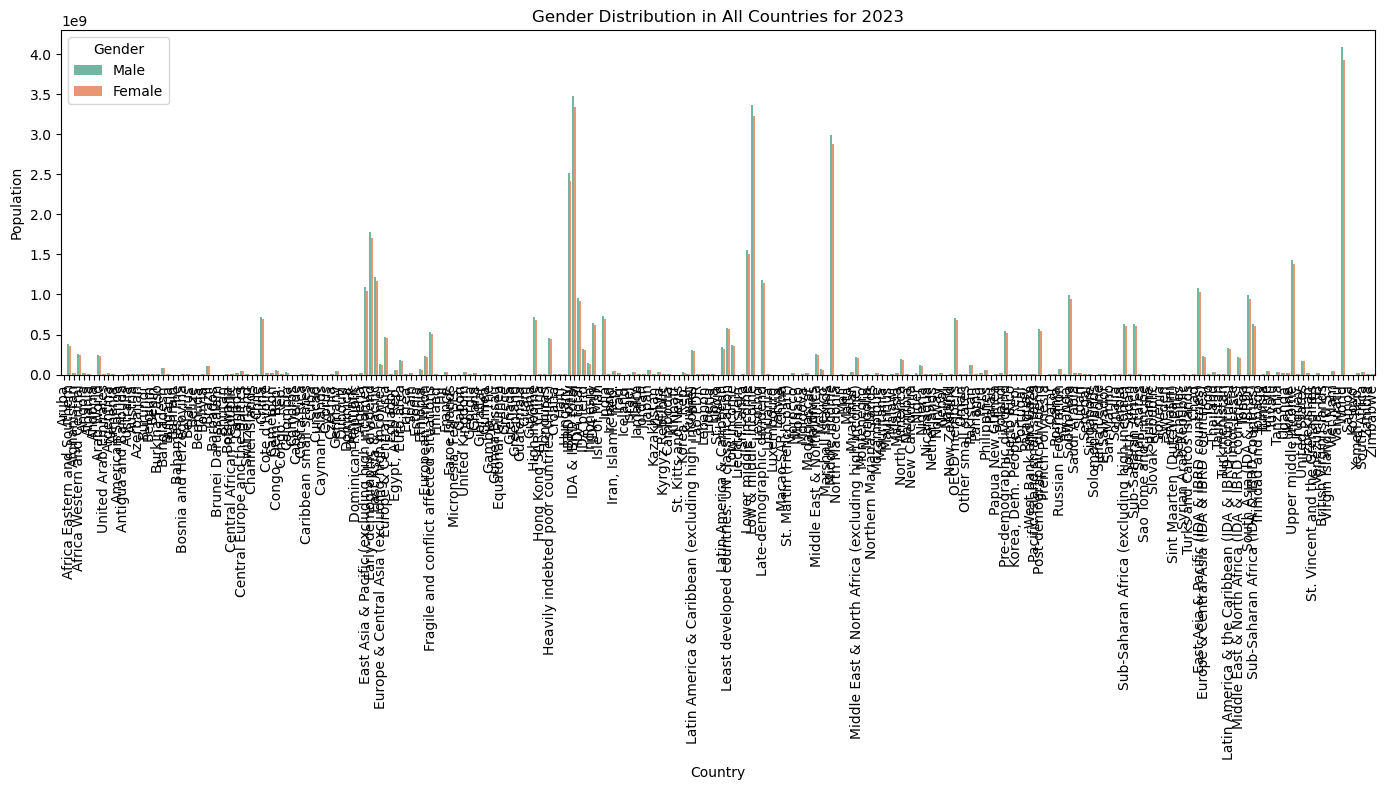

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the uploaded CSV file
file_path = 'API_SP.POP.TOTL_DS2_en_csv_v2_2391096.csv'
df = pd.read_csv(file_path, skiprows=4)

# Get the latest available year (last column in the dataframe)
latest_year = df.columns[-2]  # Use the second to last column since the last column is 'Unnamed'

# Filter the data for the latest year
latest_data = df[['Country Name', latest_year]].dropna()

# Rename columns for easier access
latest_data.columns = ['Country', 'Population']

# Convert population to numeric (in case it's read as a string)
latest_data['Population'] = pd.to_numeric(latest_data['Population'], errors='coerce')

# Drop rows where population data could not be converted to numeric
latest_data = latest_data.dropna(subset=['Population'])

# Mock gender distribution for all countries
gender_data = {
    'Country': [],
    'Gender': [],
    'Population': []
}

for idx, row in latest_data.iterrows():
    country = row['Country']
    total_population = row['Population']
    male_population = total_population * 0.51  # Assume 51% male
    female_population = total_population * 0.49  # Assume 49% female
    gender_data['Country'].extend([country, country])
    gender_data['Gender'].extend(['Male', 'Female'])
    gender_data['Population'].extend([male_population, female_population])

gender_df = pd.DataFrame(gender_data)

# Plot the gender distribution as a bar plot
plt.figure(figsize=(14, 8))
sns.set_palette("Set2")  # Use a clean color palette

# Create a bar plot
sns.barplot(data=gender_df, x='Country', y='Population', hue='Gender')

plt.xlabel('Country')
plt.ylabel('Population')
plt.title(f'Gender Distribution in All Countries for {latest_year}')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()
